In [1]:
import pandas as pd
import os

csvFile = '01. CCTV_in_Seoul.csv'
xlsFile = '01. population_in_Seoul.xls'

In [2]:
cctv_df = pd.read_csv(csvFile)
cctv_df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
pop_df = pd.read_excel(xlsFile,header=2, usecols='B, D, G, J, N')
pop_df.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [4]:
#pop_df.columns=['구별','인구수','한국인','외국인','고령자']
# rename() 함수로도 확인
pop_df.rename(columns={'자치구':'구별','계':'인구수','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'},inplace=True)
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [5]:
# 가장 적은 구 4개
cctv_df.sort_values(by='소계',ascending=True).head(4)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109


In [6]:
# 가장 많은 구 5개
#cctv_df.sort_values(by='소계',ascending=False).head(5)
cctv_df.sort_values(by='소계',ascending=True).tail(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [7]:
#컬럼을 추가 -> '최근 증가율'을 계산해서 추가
cctv_df['최근증가율'] = ((cctv_df['2014년']+cctv_df['2015년']+cctv_df['2016년'])/cctv_df['2013년도 이전']) * 100
cctv_df

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [8]:
cctv_df['기관명'].unique() # 종류

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [9]:
# isna() , isnull() 은 동일함
pop_df.dropna(inplace=True)
pop_df

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [10]:
pop_df['외국인비율'] = pop_df['외국인'] / pop_df['인구수']
pop_df['고령자비율'] = pop_df['고령자'] / pop_df['인구수']
pop_df.sort_values("인구수")

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
18,금천구,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
4,성동구,311244.0,303380.0,7864.0,39997.0,0.025266,0.128507
13,서대문구,327163.0,314982.0,12181.0,48161.0,0.037232,0.147208
9,강북구,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.005785,0.147175
6,동대문구,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613
5,광진구,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428


In [11]:
all_df = pd.merge(cctv_df,pop_df,left_on='기관명',right_on='구별')
all_df['CCTV비율'] = all_df['소계'] / all_df['인구수']
all_df.drop(['2013년도 이전','2014년','2015년','2016년','구별'],axis=1,inplace=True)
all_df.set_index("기관명",inplace=True)
all_df

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
기관명,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722,0.004873
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516,0.001706
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003,0.002265
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158,0.001464
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553,0.002847
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428,0.001900
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895,0.003485
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253,0.003979
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.006707,0.126349,0.002222


In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
f_path = 'C:\Windows\\Fonts\\malgun.ttf'
names = font_manager.FontProperties(fname=f_path).get_name()
plt.rc('font',family=names)

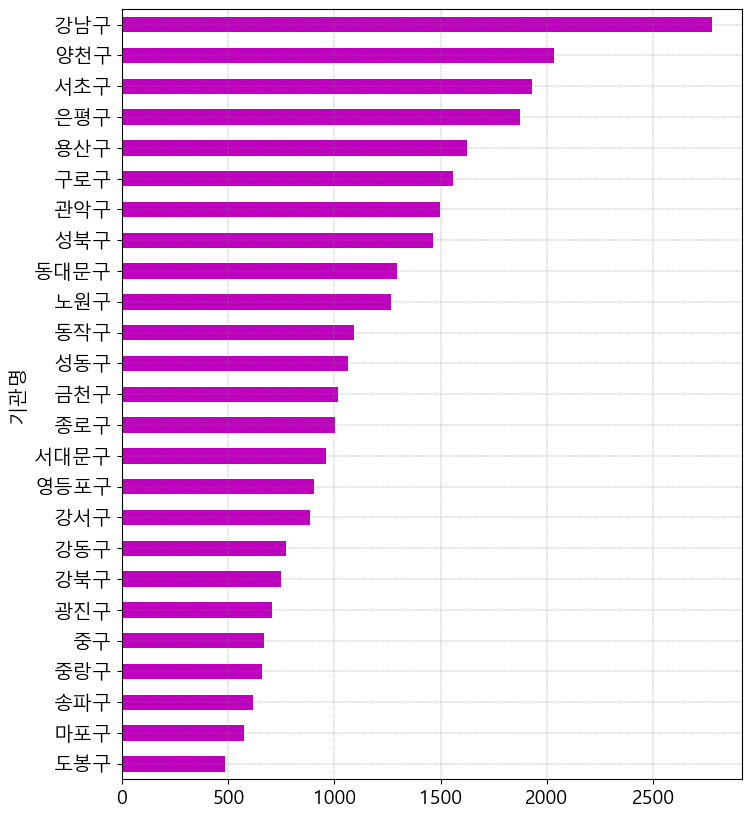

In [16]:
plt.figure()

all_df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(8,10),color='m')

plt.grid(color='gray',ls='--',lw=.3)
plt.show()

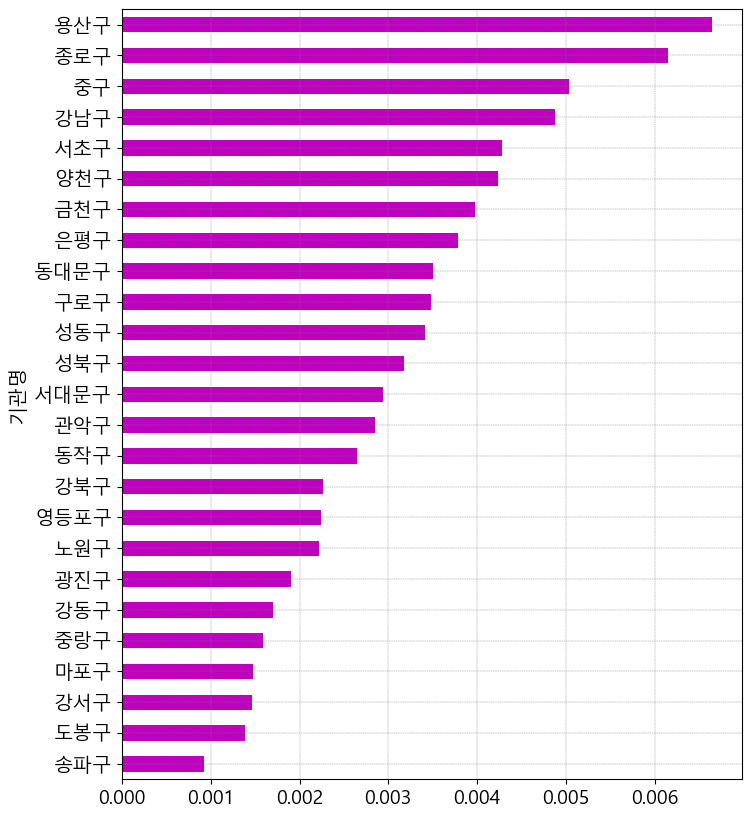

In [17]:
plt.figure()

all_df['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(8,10),color='m')

plt.grid(color='gray',ls='--',lw=.3)

plt.show()

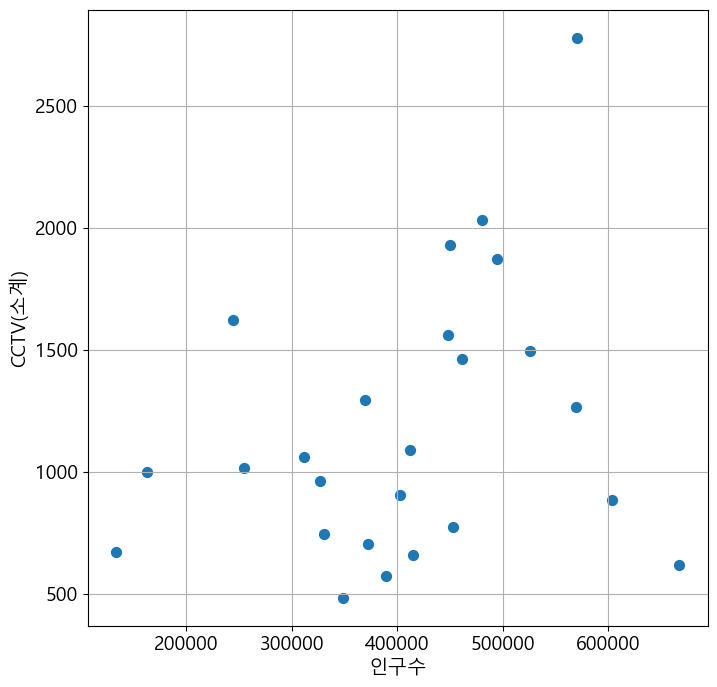

In [18]:
# scatter()함수를 통해서 '인구수'(x) 대비 '소계'(y)를 시각화
plt.figure(figsize=(8,8))
plt.scatter(all_df['인구수'], all_df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV(소계)')
plt.grid()
plt.show()